In [1]:
import pandas as pd
import matplotlib.pyplot as plt

attributes_path = '/workspace/CUB_200_2011/attributes.txt'
attributes = pd.read_csv(attributes_path, sep=" ", names=['attribute_id', 'attribute_description'], index_col=0)

labels_path = '/workspace/CUB_200_2011/attributes/image_attribute_labels.txt'
labels = pd.read_csv(labels_path, sep=" ", names=['image_id', 'attribute_id', 'is_present', 'certainty', 'temp'])

print("Attributes Data:")
print(attributes.head())
print("\nLabels Data:")
print(labels.head())


Attributes Data:
                            attribute_description
attribute_id                                     
1             has_bill_shape::curved_(up_or_down)
2                          has_bill_shape::dagger
3                          has_bill_shape::hooked
4                          has_bill_shape::needle
5                  has_bill_shape::hooked_seabird

Labels Data:
   image_id  attribute_id  is_present  certainty    temp
0         1             1           0          3  27.708
1         1             2           0          3  27.708
2         1             3           0          3  27.708
3         1             4           0          3  27.708
4         1             5           1          3  27.708


In [2]:
definitely_present = labels[(labels['is_present'] == 1) & (labels['certainty'] == 4)]

attribute_counts = definitely_present['attribute_id'].value_counts()

attribute_summary = attributes.join(attribute_counts.rename('count'))
attribute_summary['count'] = attribute_summary['count'].fillna(0).astype(int)

print("\nAttribute Presence Summary:")
print(attribute_summary)



Attribute Presence Summary:
                            attribute_description  count
attribute_id                                            
1             has_bill_shape::curved_(up_or_down)    149
2                          has_bill_shape::dagger    887
3                          has_bill_shape::hooked     99
4                          has_bill_shape::needle    190
5                  has_bill_shape::hooked_seabird    461
...                                           ...    ...
308                         has_crown_color::buff    822
309                       has_wing_pattern::solid   2109
310                     has_wing_pattern::spotted    577
311                     has_wing_pattern::striped   1333
312               has_wing_pattern::multi-colored   2009

[312 rows x 2 columns]


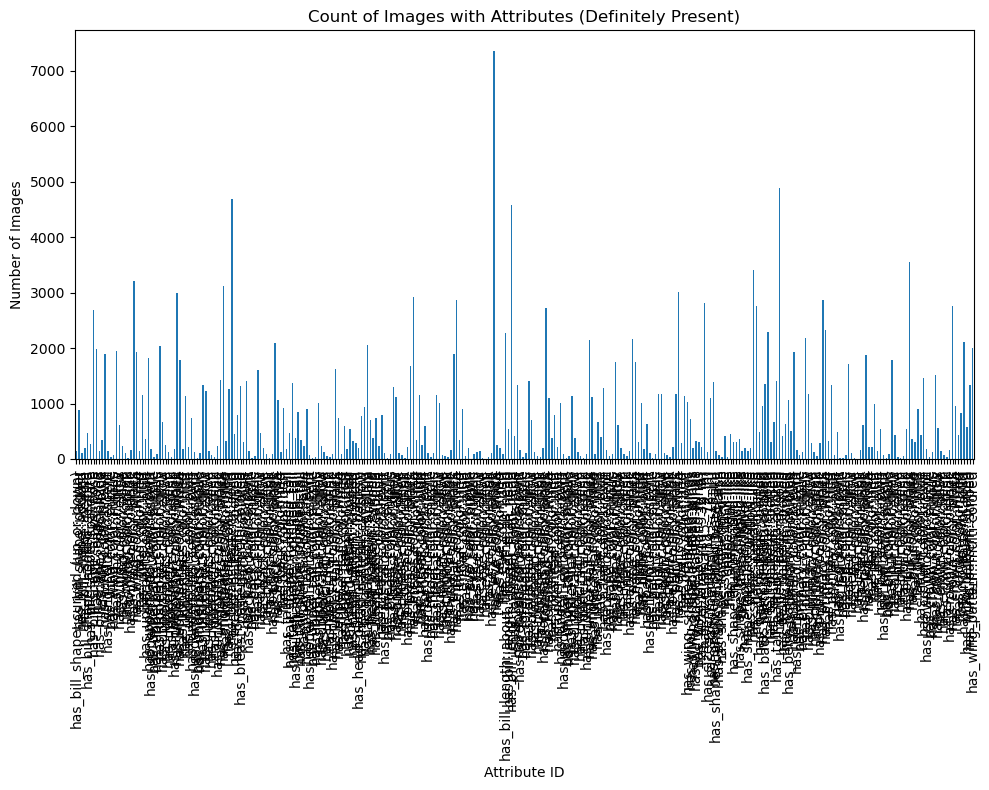

In [3]:
plt.figure(figsize=(10, 8))
attribute_summary['count'].plot(kind='bar')
plt.title('Count of Images with Attributes (Definitely Present)')
plt.xlabel('Attribute ID')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(attribute_summary)), labels=attribute_summary['attribute_description'], rotation=90)
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

attributes_path = '/workspace/CUB_200_2011/attributes.txt'
attributes = pd.read_csv(attributes_path, delimiter='\s+', header=None, names=['attribute_id', 'description'], engine='python')

labels_path = '/workspace/CUB_200_2011/attributes/image_attribute_labels.txt'
labels = pd.read_csv(labels_path, delim_whitespace=True, header=None, names=['image_id', 'attribute_id', 'is_present', 'certainty', 'temp'])

def split_description(description):
    parts = description.split('::')
    if len(parts) >= 2:
        return parts[0], parts[1]
    else:
        print(f"Formatting error with: {description}")
        return None, None

attributes[['group', 'property']] = attributes['description'].apply(lambda x: pd.Series(split_description(x)))

labels_with_group_property = labels.merge(attributes[['attribute_id', 'group', 'property']], on='attribute_id')

group_property_present_counts = labels_with_group_property.groupby(['group', 'property', 'is_present']).image_id.nunique()

print(group_property_present_counts)


group           property       is_present
has_back_color  black          0              8417
                               1              3371
                blue           0             11268
                               1               520
                brown          0              9458
                                             ...  
has_wing_shape  pointed-wings  1              2352
                rounded-wings  0              8495
                               1              3293
                tapered-wings  0             10828
                               1               960
Name: image_id, Length: 624, dtype: int64


In [27]:
attributes[['group', 'property']] = attributes['description'].apply(lambda x: pd.Series(split_description(x)))

labels_with_group_property = labels.merge(attributes[['attribute_id', 'group', 'property']], on='attribute_id')

group_property_present_counts = labels_with_group_property.groupby(['group', 'property', 'is_present']).image_id.nunique().unstack(fill_value=0)

group_property_present_counts['diff'] = (group_property_present_counts[0] - group_property_present_counts[1]).abs()

top_balanced = group_property_present_counts.sort_values(by='diff').head(20)

top_balanced


,is_present,0,1,diff
group,property,,,
has_size,small_(5_-_9_in),5758,6030,272
has_shape,perching-like,6050,5738,312
has_breast_pattern,solid,5325,6463,1138
has_bill_color,black,6580,5208,1372
has_bill_length,shorter_than_head,5174,6614,1440
has_wing_color,black,6737,5051,1686
has_belly_pattern,solid,5028,6760,1732
has_bill_shape,all-purpose,7170,4618,2552
has_upperparts_color,black,7176,4612,2564


<Figure size 1000x800 with 0 Axes>

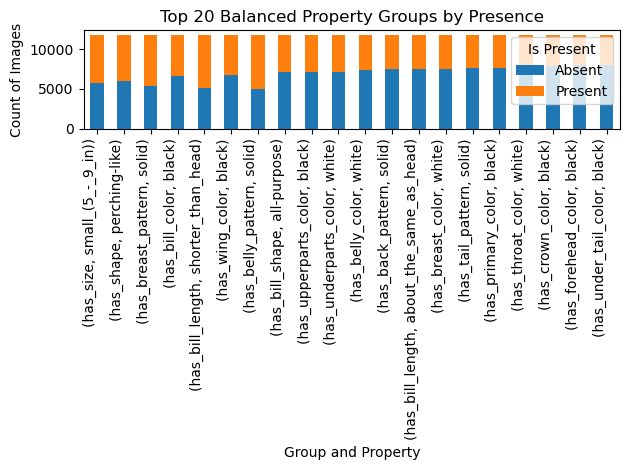

In [29]:
plt.figure(figsize=(10, 8))
top_balanced[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Top 20 Balanced Property Groups')
plt.xlabel('Group and Property')
plt.ylabel('Count of Images')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Is Present', labels=['Absent', 'Present'])
plt.tight_layout()
plt.show()
